# Analysis Pipeline for Video Audio Video Comprehension

## Previous work 
<img src="ScriptDescriptions.png" width = 1000>

```
script_path = '/Volumes/GoogleDrive/My Drive/EEG_DATA_PIERRE/Scripts'
```

### MNE python
Working on the MNE library to recreate the same matlab funcitons: 
Location:
https://mne.tools/stable/auto_tutorials/intro/10_overview.html#sphx-glr-auto-tutorials-intro-10-overview-py

## Matlab code

``` 
load('Params');
```

#### PREPROCESSING OF DATA
Additional options are 'task' for timeline figure or 'behavior' for histogram with behavioral data
```
[EventData, BEEPdata] = PreProcessPop(Params, 'padding', 2);                
```
    
#### AUTOMATIC ARTEFACT REJECTION - INTERPOLATION - INDEPENDANT COMPONENT ANALYSIS
```
[CleanData, trials, BadIdx] = reject_artefact(EventData);
save TrialIndex trials
save BadChannelIndex BadIdx

popout_ica(CleanData);

[cleanBEEPData, ~ , ~] = reject_artefact(BEEPdata);

popout_ica(cleanBEEPData);
```


#### PREPROCESSING OF SOUND ENVELOPPE 
```
cfgSound = [];
cfgSound.trials     = 'all';%trialIdx;
cfgSound.channel    = 'audio';
cfgSound.dftfilter  = 'yes';
cfgSound.dftfreq    = [50 100 150];
cfgSound.hpfilter   = 'yes';
cfgSound.hpfilttype = 'but';
cfgSound.hpfiltord  = 8;
cfgSound.hpfreq     = 100;

sound               = ft_preprocessing(cfgSound,EventData(2,1));

save('data_sound', 'sound')
% save('BEEP_sound', 'sound')
```

In [59]:
# IMPORTS: 
import os
import numpy as np
import mne
import scipy

# DATA LOCATION:
data_path = '/Volumes/GoogleDrive/My Drive/EEG_DATA_PIERRE/PAT_3066'
# data_path = '/Volumes/GoogleDrive/My Drive/EEG_DATA_PIERRE/S20'
script_path = '/Volumes/GoogleDrive/My Drive/EEG_DATA_PIERRE/Scripts'


# LOAD DATA 
# data_raw_file = os.path.join(data_path, 'S20_20181217_014956.mff')
data_raw_file = os.path.join(data_path, 'PAT_3066_EEG_695997_Anon_FLM.edf')
raw = mne.io.read_raw_edf(data_raw_file)

Extracting EDF parameters from /Volumes/GoogleDrive/My Drive/EEG_DATA_PIERRE/PAT_3066/PAT_3066_EEG_695997_Anon_FLM.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Info | 7 non-empty values
 bads: []
 ch_names: FIG1, FIG2, FIG3, FIG4, FIG5, FIG6, FIG7, FIG8, FIG9, FIG10, ...
 chs: 212 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 1024.0 Hz
 meas_date: 2022-04-29 15:09:24 UTC
 nchan: 212
 projs: []
 sfreq: 2048.0 Hz
>
['FIG1', 'FIG2', 'FIG3', 'FIG4', 'FIG5', 'FIG6', 'FIG7', 'FIG8', 'FIG9', 'FIG10', 'FIG11', 'FIG12', 'FOG1', 'FOG2', 'FOG3', 'FOG4', 'FOG5', 'FOG6', 'FOG7', 'FOG8', 'FOG9', 'FOG10', 'FOG11', 'FOG12', 'FOG13', 'FOG14', 'FOG15', 'CAG1', 'CAG2', 'CAG3', 'CAG4', 'CAG5', 'CAG6', 'CAG7', 'CAG8', 'CAG9', 'CAG10', 'CAG11', 'CAG12', 'IAG1', 'IAG2', 'IAG3', 'IAG4', 'IAG5', 'IAG6', 'IAG7', 'IAG8', 'IAG9', 'IAG10', 'IAG11', 'IAG12', 'IAG13', 'IAG14', 'IAG15', 'IAG16', 'IAG17', 'IAG18', 'MKR1+', 'IMG1', 'IMG2', 'IMG3', 'IMG4', 'IMG5', 'IMG6', 'IMG7', 'IMG8', 'IMG9', 'IMG10', 'IMG11', 'IMG12', 'IMG13', 'IMG14', 'IMG15', 'IMG16', 'IMG17', 'IMG18', 'AG1', 'AG2', 'AG3', 'AG4', 'AG5', 'AG6', 'AG7', 'AG8', 'AG9', 'AG10', 'HAG1', 'HAG2', 'H

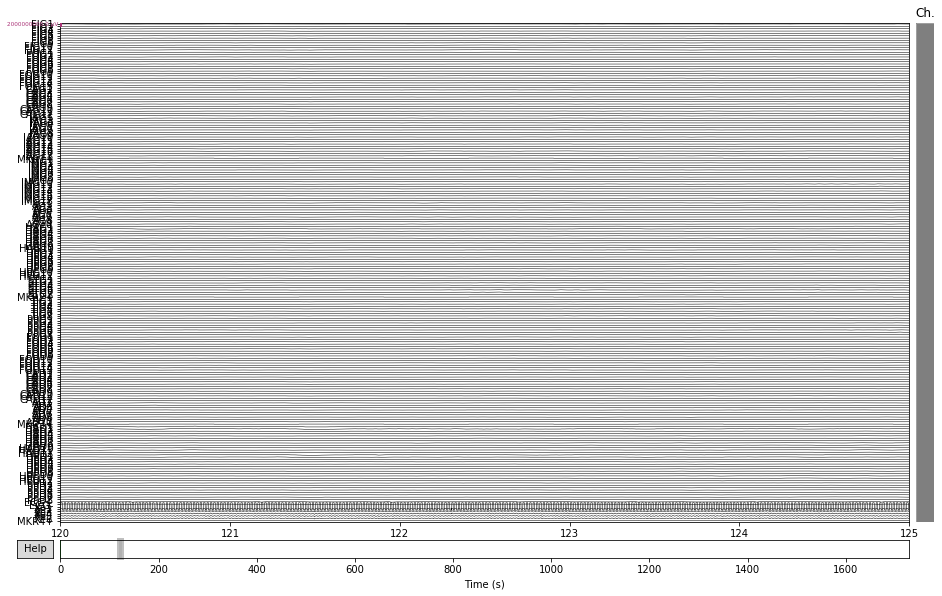

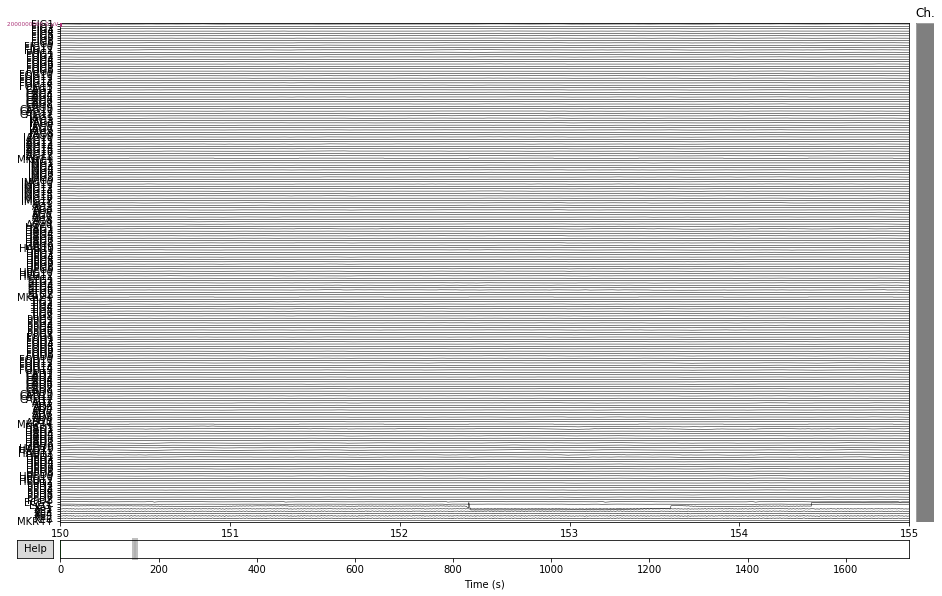

Trigger channel has a non-zero initial value of 3199 (consider using initial_event=True to detect this event)
717080 events found
Event IDs: [    1     2     3 ... 65533 65534 65535]


ValueError: You have 551376 events shorter than the shortest_event. These are very unusual and you may want to set min_duration to a larger value e.g. x / raw.info['sfreq']. Where x = 1 sample shorter than the shortest event length.

In [77]:
# Some information about the DATASET: 
print(raw.info)
infodata = raw.info

## FURTHER INFORMATION
print(raw.info.ch_names)

picks = mne.pick_channels_regexp(raw.info.ch_names, regexp='')
print(picks)
raw.plot(order=picks, n_channels=len(picks), duration=5, scalings=1000, start=120)

raw2.plot(order=picks, n_channels=len(raw.info.pick_channels)-9, duration=5, event_color='cyan', scalings=1000, start=150)
events = mne.find_events(raw2, stim_channel='Xe1', initial_event=False,uint_cast=True, min_duration=1/raw.info['sfreq'], )


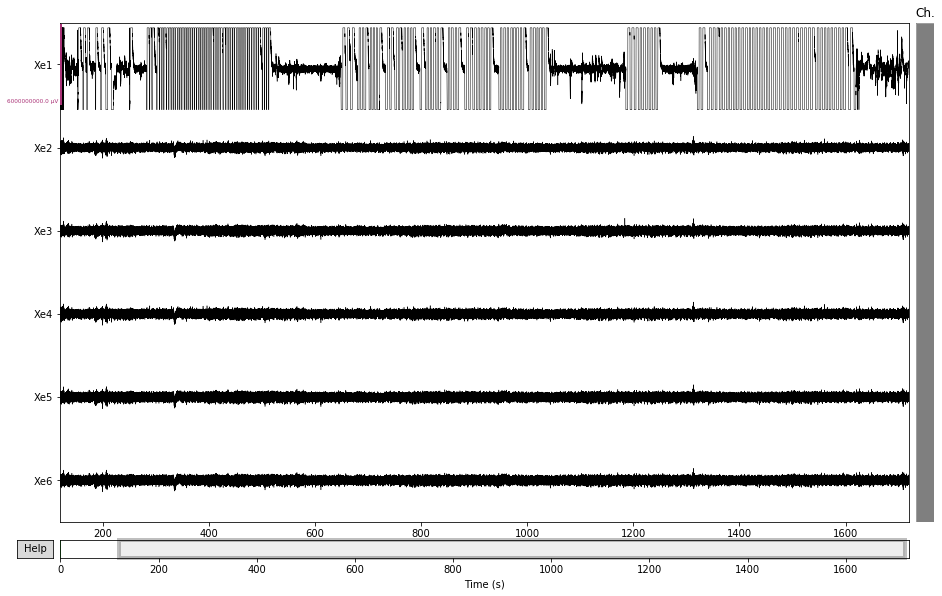

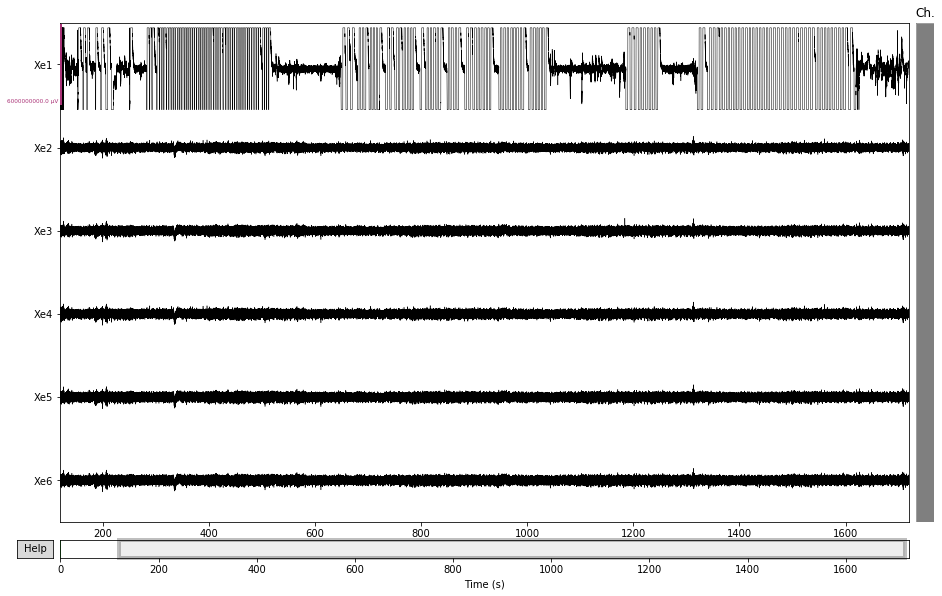

In [70]:

# raw.plot(duration=60)
picks = mne.pick_channels_regexp(raw.info.ch_names, regexp='Xe')
raw.plot(order=picks, n_channels=len(picks), duration=1600, scalings=3000, start=120)

In [16]:
# raw2 = raw.copy()
# raw2.info['bads'] = []
# picks = mne.pick_channels_regexp(raw2.info.ch_names, regexp='S')
# print(picks)
# raw2.plot(order=picks, n_channels=len(picks), duration=2)


In [37]:
raw2 = raw.copy()
raw2.info['bads'] = []
picks = mne.pick_channels_regexp(raw2.info.ch_names, regexp='ST')
print(picks)
events = mne.find_events(raw2, stim_channel='Xe1', initial_event=True,uint_cast=True)

raw2.plot(order=picks, n_channels=len(picks), duration=5, event_color='cyan', scalings=0.1)
print(events)
epochs = mne.Epochs(raw2, events=events)['2'].average().plot()

[108, 109, 110, 111, 112, 113, 114, 115]


ValueError: No stim channel found to extract event triggers.

### Independend Component Analysis: 
```
[CleanData, trials, BadIdx] = reject_artefact(EventData);
save TrialIndex trials
save BadChannelIndex BadIdx

popout_ica(CleanData);

[cleanBEEPData, ~ , ~] = reject_artefact(BEEPdata);

popout_ica(cleanBEEPData);
```



In [ ]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
temporary = os.path.join(data_path, 'BadChannelIndex.mat')
ica.exclude = scipy.io.loadmat(temporary)  # [1, 2]  # details on how we picked these are omitted here

ica.plot_properties(raw, picks=ica.exclude)

In [ ]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

# identify channels
temporary = os.path.join(data_path, 'Params.mat')
params = scipy.io.loadmat(temporary) 

# show some frontal channels to clearly illustrate the artifact removal
chs =  params.channels # ['e1','e2']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_raw.plot(order=chan_idxs, start=12, duration=4)
raw.plot(order=chan_idxs, start=12, duration=4)

### Triggers: 
```
events = mne.find_events(raw, stim_channel='STI 014')
print(events[:5])  # show the first 5
```

In [ ]:
events = mne.find_events(raw, stim_channel='STI 014')
print(events[:5])  # show the first 5

# event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
#               'visual/right': 4, 'smiley': 5, 'buttonpress': 32} 
event_dict = params.triggers

fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)